# Flow of the Antarctic Ice sheet
As described in the previous section, ice flows as a viscous fluid under gravity. The flow is three dimensional and preceeds at different rates in differnt locations and at different depths within an ice sheet or glacier. 

Many techniques exist for measuring the flow of ice. The most straightforward involves installing a marker in the ice surface, such as an aluminium pole, sometimes called a glacio pole, and measuring its location relative to some datum at multiple different times. This is now often done using Global Navigation Satellite System (GNSS) receivers, but traditionally was achieved using a theodelite and a local reference frame.

{numref}`fig:gps_measurement` shows an example of using a GNSS recevier to measure the position of glacio pole precisely. 



```{figure} ../../images/gps_measurement.png
---
height: 500px
name: fig:gps_measurement
---
A scientist makes notes next to an aluminium glacio pole installed in the surface of the Antarctic Ice Sheet. A GNSS receiver secured to the top of the pole makes a detailed measurement of its position, which was repeated about a year later to approximate the surface ice flow velocity in three dimensions. Each of the GNSS measurements took around 20 minutes. Because this location is close to an ice divide, the ice flow is very slow < 1 m a$^{-1}$ (Kingslake et a., 2016). Photo credit: Iain Rudkin.  
```


An alternative approach is to identify features already present on the glacier's surface and track their movement over time. One of the earliest applications of this approach was performed by the glaciologist John Nye. In 1956, on an expedition to Austerdalsbreen, an outlet of Jostedalsbreen, an ice cap in Norway, Nye took repeat photographs of a fast-moving, upstream section of the glacier over a period of around 30 days. The team then carefully recorded the relative motion of prominent features on the ice surface (crevasses and seracs) and used these measurements to compute velocities along a profile. Nye's talk, which covered this experiment and several other interesting early history from the early days of glaciology, can be found [here](https://www.youtube.com/watch?v=5w38d4GL2O4). A time lapse video of the  Austerdahlsbreen images can be found around [minute thirty-eight](https://youtu.be/5w38d4GL2O4?t=2307).

The modern version of Nye's approach of taking multiple photographs of a glacier's surface to determine its flow speed is to use satellites to track the movement of the ice surface. The basic approach is to obtain repeat imagery of an ice surface and compute the apparent movement of surface features. This is called feature tracking. There are many other related techniques that produce complimentary datasets of ice velocity as a function of space and time, which are often collated into nearly spatially complete maps of the spatial variation of the surface velocity. One such collection is supplied by the MEaSURES Project, covering the Antarctic Ice Sheet These data are availible free to the public (Appendix (add LINK)). 

Let's load it here and examine the structure of the ice flow. 

First we need two python package: `fsspec` to help to load tha data and `xarray` to do some computations and plot the data.

In [1]:
import fsspec
import xarray as xr

Now we will use these packages to load the data into a multi-dimensional data structure called an `xarray.Dataset`.

In [36]:
M = xr.open_zarr(fsspec.get_mapper('gs://ldeo-glaciology/measures/measures')) 
M

<xarray.Dataset>
Dimensions:       (y: 12445, x: 12445)
Coordinates:
    lat           (y, x) float64 dask.array<chunksize=(389, 778), meta=np.ndarray>
    lon           (y, x) float64 dask.array<chunksize=(389, 778), meta=np.ndarray>
  * x             (x) float64 -2.8e+06 -2.8e+06 -2.799e+06 ... 2.799e+06 2.8e+06
  * y             (y) float64 2.8e+06 2.8e+06 2.799e+06 ... -2.799e+06 -2.8e+06
Data variables:
    CNT           (y, x) int32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    ERRX          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    ERRY          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    STDX          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    STDY          (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    VX            (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    VY            (y, x) float32 dask.array<chunksize=(778, 778), meta=np.ndarray>
    coord_system  |S1 ...
Attributes: (12/26)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    cdm_data_type:             Grid
    creator_name:              J. Mouginot
    date_created:              2017-04-06T17:47:44.00004923343322Z
    geospatial_lat_max:        -60
    ...                        ...
    spatial_resolution:        450m
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    summary:                    
    time_coverage_end:         2016-12-31
    time_coverage_start:       1995-01-01
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing

Contained in this `xarray.Dataset` are dimensions, coordinates and data variables. The data variables contain various data we might be interested in. For example, the speed of the ice in two orthogonal directions, corresponding to the two coordinates `x` and `y`. Lots of additional information is contained in the attributes of the dataset and of the individual dataarrays. 

To compute the overall speed from the two orthogonal components, we use Pythagoras' theorem:

In [37]:
speed = (M.VX**2 + M.VY**2)**0.5
speed.name = 'speed'
speed.attrs['units'] = 'meter/year'
speed.attrs['long_name'] = 'ice speed'
speed

<xarray.DataArray 'speed' (y: 12445, x: 12445)>
dask.array<pow, shape=(12445, 12445), dtype=float32, chunksize=(778, 778), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float64 dask.array<chunksize=(389, 778), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(389, 778), meta=np.ndarray>
  * x        (x) float64 -2.8e+06 -2.8e+06 -2.799e+06 ... 2.799e+06 2.8e+06
  * y        (y) float64 2.8e+06 2.8e+06 2.799e+06 ... -2.799e+06 -2.8e+06
Attributes:
    units:      meter/year
    long_name:  ice speed

We can plot a small section of the data to take a look at the structure of the flow of the ice sheet. To avoid downloading a large quantity of data we will only plot every 8th data point and only over a relatviely small area. 

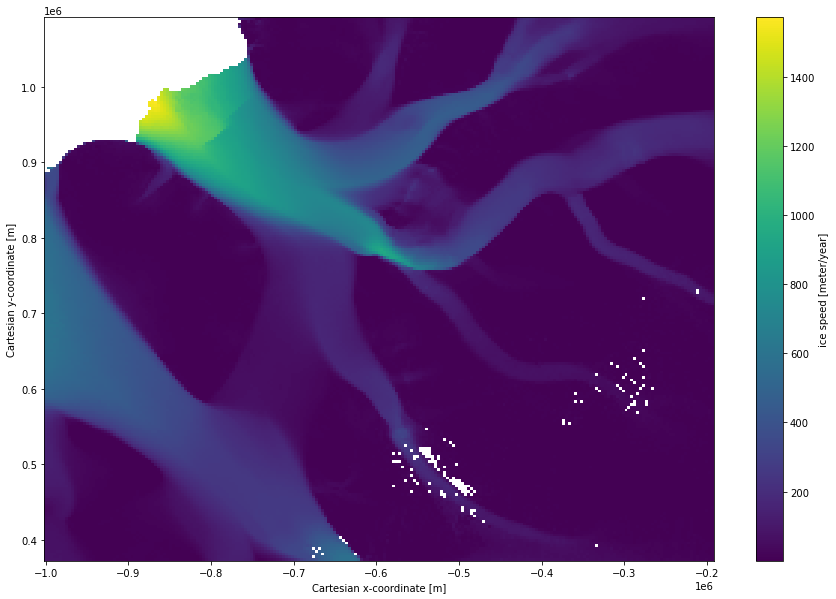

In [38]:
speed_subset = speed.isel(x=slice(4000,5800,8), y = slice(3800,5400,8))
speed_subset.plot(size=10);

This plot shows an arbitrary portion of the ice sheet, covering part of the Ronne-Filchner Ice Shelf and some ice rises which form within and adjacent to it. 

Two stricking charateristics of the flow speed are 1) that it varies by orders of magnitude over relatively short distances, and 2) the fastest flowing areas are arranged into long thin corridors of ice, which where they aare grounded are referred to as ice streams. 

We can demonstrate point 1) by simply plotting a histogram of the speeds in this portion of the ice sheet:

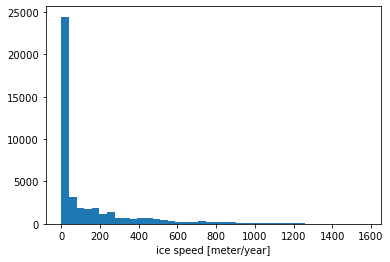

In [39]:
speed_subset.plot.hist(bins=40);

... or by looking at the minimum and maximum values:

In [40]:
print(f" The slowest ice in this subset is moving at only {speed_subset.min().values:.2} meters/year")
print(f" but the fastest ice in this subset is moving at {speed_subset.max().values/1e3:.2} km/year.")

 The slowest ice in this subset is moving at only 0.013 meters/year
 but the fastest ice in this subset is moving at 1.6 km/year.


In the next few sections we build up the theoretical tools needed to build a simple model of ice flow. These will include:
- fundamental vector calculus
- strain and how it relates to velocity
- rheology
- stress and strain tensors
- deviatoric stress
- driving stress
- depth-integrated mass balance
- the stress balance equations

Finally, these will be combined to build a simplified ice sheet model based on the shallow ice approximation. In subsequent sections we will solve this model numerically to examine the broad-scale controls on ice flow and ice sheet topography. 